In [1]:
# importamos módulos
import datetime, time, io
import numpy    as np
import pandas   as pd
import yfinance as yf
from random import sample
from matplotlib import pyplot as plt
import numpy, os
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# parámetros para gráficar
plt.rcParams.update({'figure.figsize': (16, 8), 'figure.dpi': 200})
plt.style.use('bmh')

# función para gráficar
def plot_ts(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,8), dpi=dpi)
    plt.plot(x, y, color='purple')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [39]:
df_       = pd.read_excel(r'C:\Users\luis9\OneDrive\CIMAT PPE\Semestres\S04\Series de Tiempo\!!! Proyecto\Data_Final\Untitled Folder\NASDAQ_100.xlsx')
symbols   = df_.columns[1:].tolist() # simbolos de los valores
df_.index = df_['Date']              # fechas como indice
df_       = df_[symbols]             # df_ con los precios de los valores al cierre del dían de trading
df_

,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,129.410004,139.149994,485.339996,146.020004,168.960007,296.839996,81.540001,526.460022,86.870003,92.300003,...,729.770020,162.220001,202.880005,213.580002,229.429993,41.400002,228.080002,65.660004,359.980011,196.089996
2021-01-05,131.009995,148.300003,485.690002,148.630005,168.490005,301.700012,81.430000,543.650024,89.599998,92.769997,...,735.109985,163.410004,201.970001,206.500000,228.580002,41.160000,225.360001,65.019997,360.829987,193.479996
2021-01-06,126.599998,142.770004,466.309998,149.300003,167.899994,302.869995,82.080002,540.390015,90.830002,90.330002,...,755.979980,164.220001,200.059998,199.509995,226.649994,43.029999,220.000000,66.459999,344.410004,184.419998
2021-01-07,130.919998,151.270004,477.739990,155.610001,168.850006,315.200012,79.889999,558.359985,94.559998,95.160004,...,816.039978,167.940002,200.970001,200.000000,232.899994,45.259998,226.210007,65.160004,342.500000,193.050003
2021-01-08,132.050003,149.770004,485.100006,156.740005,171.050003,319.850006,79.180000,570.530029,95.559998,94.580002,...,880.020020,171.160004,200.899994,202.440002,237.000000,45.209999,227.649994,65.760002,349.609985,197.369995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-04,166.020004,156.179993,423.350006,164.770004,228.880005,203.750000,100.720001,310.890015,118.809998,99.419998,...,952.619995,176.229996,193.529999,186.479996,273.700012,44.459999,207.759995,73.400002,108.980003,208.929993
2022-05-05,156.770004,143.089996,400.510010,158.240005,218.559998,198.389999,99.660004,283.720001,113.470001,93.870003,...,873.280029,170.279999,187.919998,175.750000,266.369995,43.779999,195.820007,72.790001,100.839996,190.410004
2022-05-06,157.279999,135.839996,391.010010,156.130005,216.940002,193.770004,99.650002,280.410004,112.500000,95.339996,...,865.650024,167.449997,185.419998,172.050003,253.929993,43.990002,189.460007,73.080002,96.379997,172.940002


In [49]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\luis9\conda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


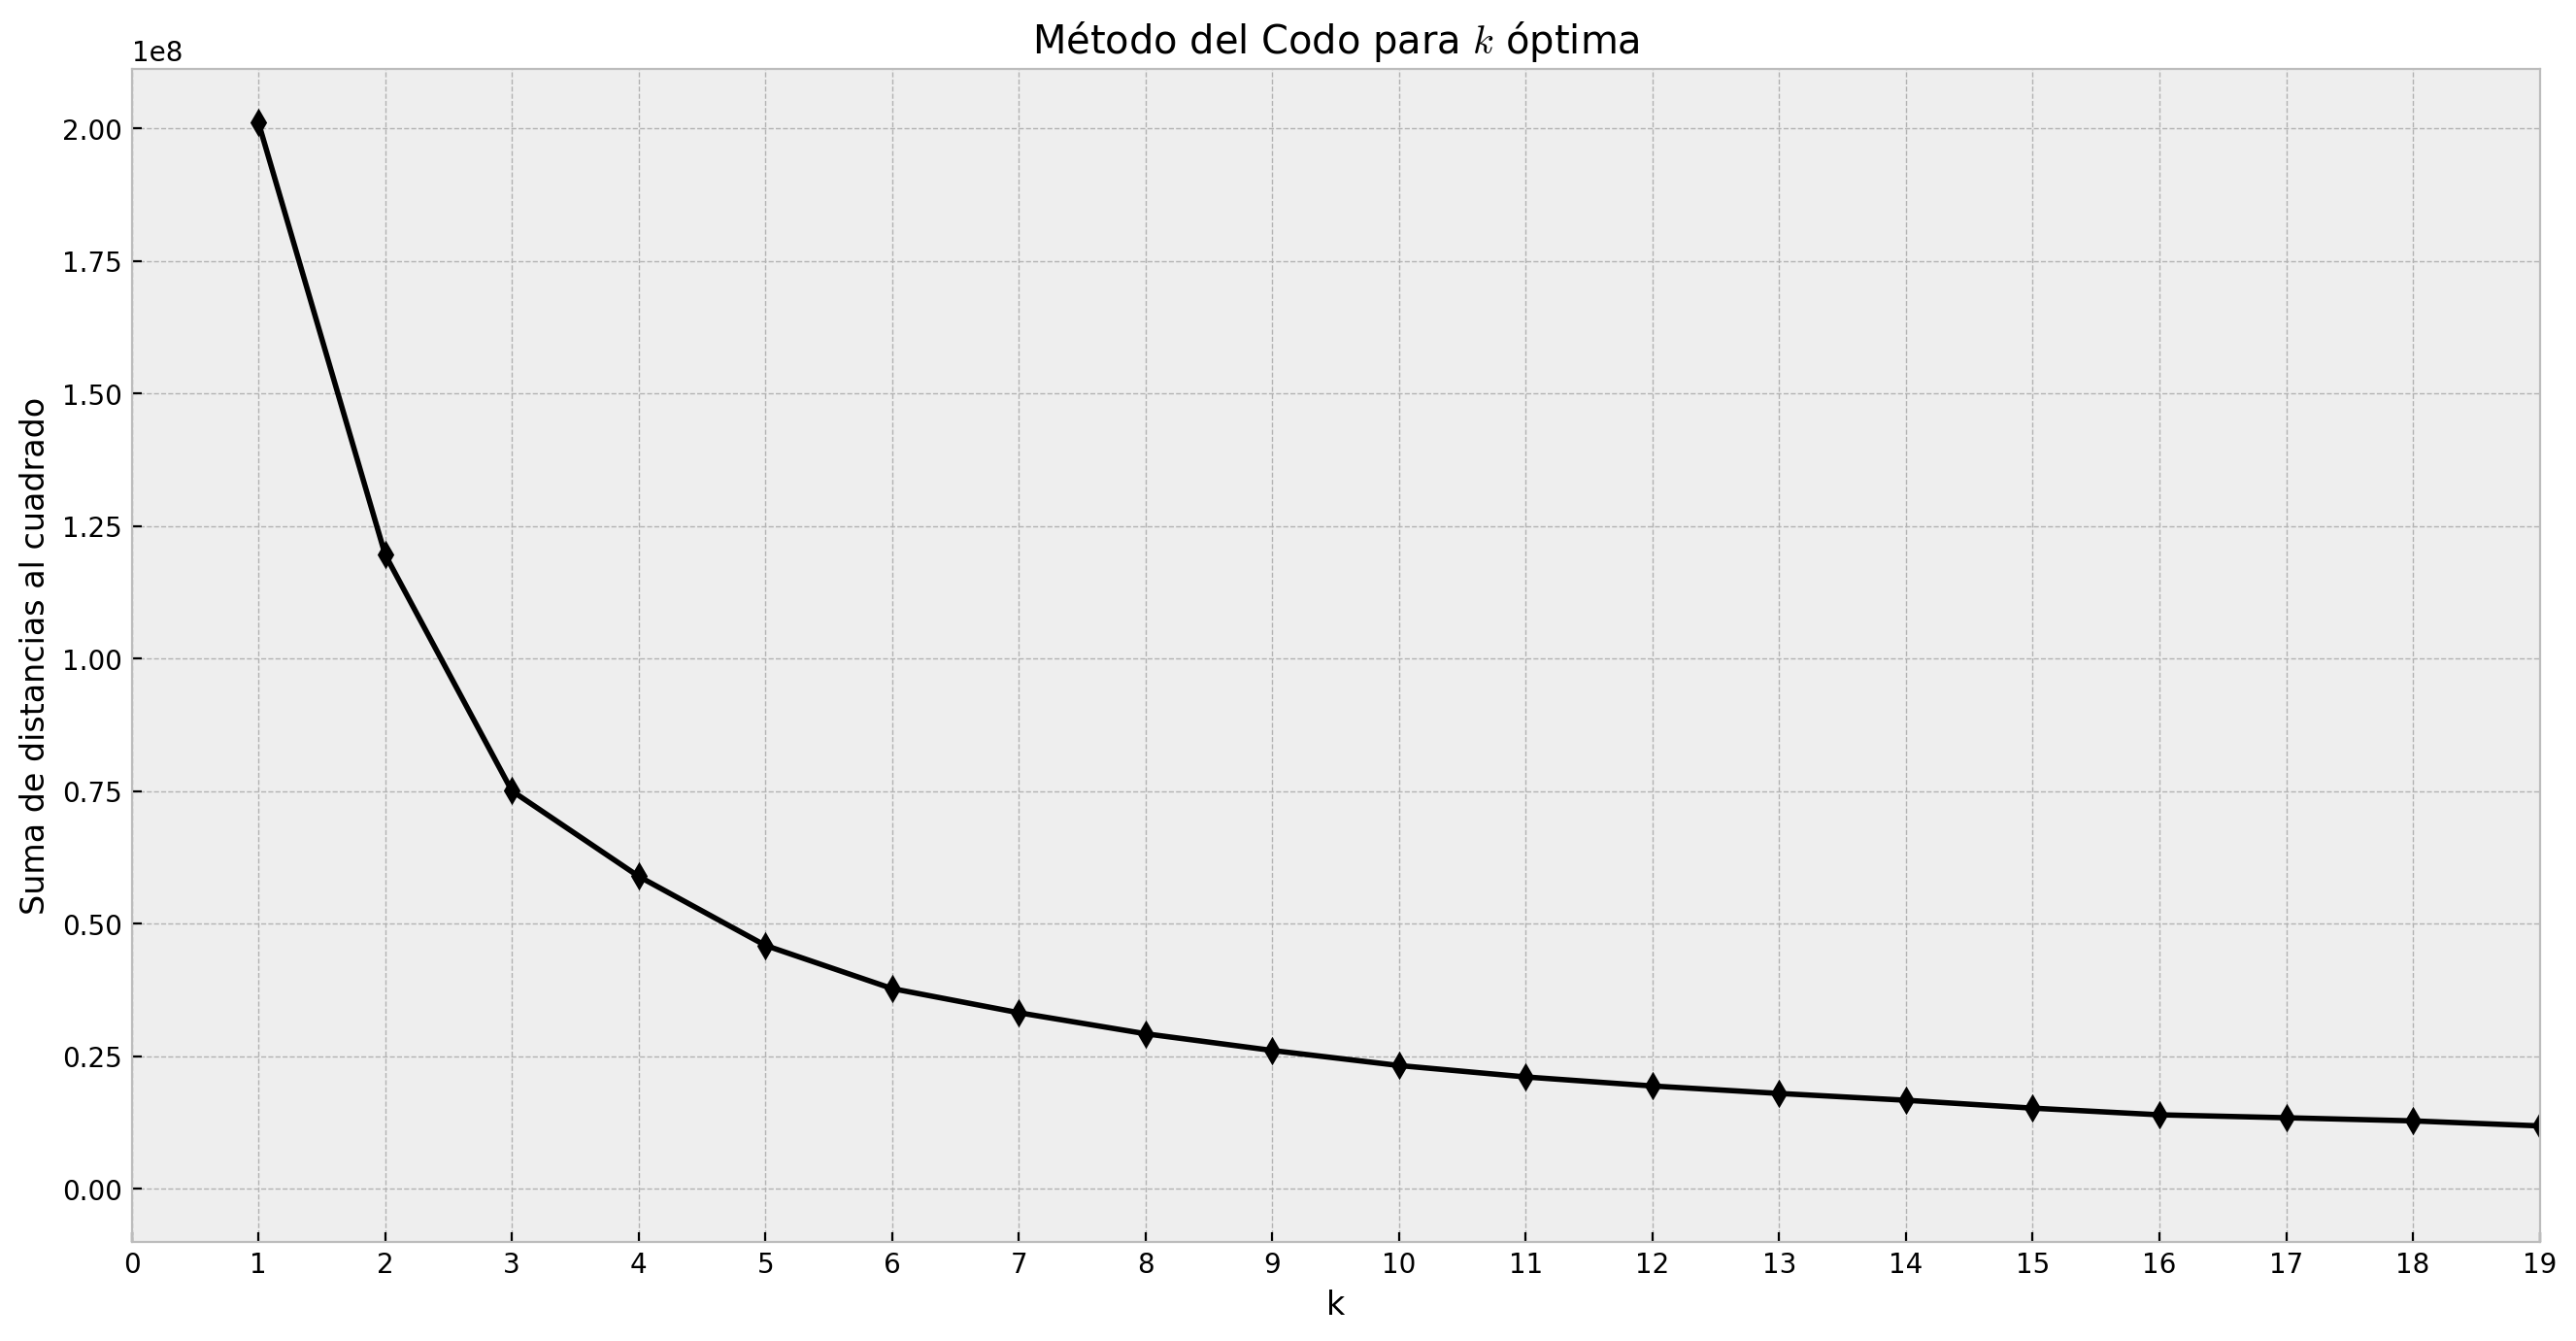

In [48]:
plt.plot(K, Sum_of_squared_distances, 'kd-')
plt.vlines(4, ymin=0, ymax=505, color='grey', linestyle='--')
plt.xlabel('k')
plt.ylabel('Suma de distancias al cuadrado')
plt.title(r'Método del Codo para $k$ óptima')
plt.ylim(0,500)
plt.xlim(0.5,19)
plt.xticks(np.arange(0,20))
plt.show()

In [6]:
df_train       = pd.read_excel(r'C:\Users\luis9\OneDrive\CIMAT PPE\Semestres\S04\Series de Tiempo\!!! Proyecto\Data_Final\Untitled Folder\NASDAQ_100_train.xlsx')
symbols   = df_train.columns[1:].tolist() # simbolos de los valores
df_train.index = df_train['Date']              # fechas como indice
df_train       = df_train[symbols]             # df_ con los precios de los valores al cierre del dían de trading
df_train

,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,-0.360207,-0.338762,0.423449,-0.323637,-0.273129,0.008426,-0.465603,0.513984,-0.453868,-0.441913,...,0.961614,-0.287969,-0.198447,-0.174889,-0.139992,-0.553980,-0.142964,-0.500566,0.147442,-0.213397
2021-01-05,-0.359275,-0.321542,0.414755,-0.320822,-0.277481,0.013228,-0.467475,0.541243,-0.449645,-0.442727,...,0.959072,-0.288567,-0.204417,-0.194531,-0.146345,-0.555358,-0.153372,-0.503287,0.142269,-0.222945
2021-01-06,-0.366274,-0.330558,0.384066,-0.316135,-0.275052,0.023065,-0.464608,0.547691,-0.445281,-0.446386,...,1.023879,-0.283180,-0.204018,-0.205233,-0.145287,-0.550860,-0.159975,-0.499109,0.114817,-0.238563
2021-01-07,-0.366315,-0.321925,0.390209,-0.312458,-0.283578,0.035658,-0.477628,0.566066,-0.445628,-0.444319,...,1.128147,-0.285563,-0.213514,-0.215630,-0.143865,-0.553167,-0.158458,-0.509758,0.095207,-0.230790
2021-01-08,-0.367710,-0.329778,0.388035,-0.314858,-0.284226,0.034298,-0.480884,0.570908,-0.445821,-0.447918,...,1.233407,-0.283990,-0.220328,-0.217032,-0.143052,-0.553601,-0.163067,-0.509611,0.098003,-0.227885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-04,-0.282098,-0.303375,0.274325,-0.284800,-0.146176,-0.200514,-0.423295,0.031154,-0.384179,-0.426106,...,1.418761,-0.260021,-0.222613,-0.237857,-0.049262,-0.544946,-0.191843,-0.482369,-0.405435,-0.189314
2022-05-05,-0.283508,-0.314393,0.266779,-0.280189,-0.144006,-0.189543,-0.412444,0.003105,-0.381265,-0.425516,...,1.334142,-0.253006,-0.213181,-0.240657,-0.036066,-0.538603,-0.195345,-0.473108,-0.409780,-0.207559
2022-05-06,-0.272412,-0.321047,0.257788,-0.275021,-0.137077,-0.189637,-0.403142,0.006900,-0.373992,-0.412918,...,1.334476,-0.249342,-0.208578,-0.238907,-0.053168,-0.529402,-0.199414,-0.463414,-0.410559,-0.236888


In [51]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_train)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\luis9\conda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


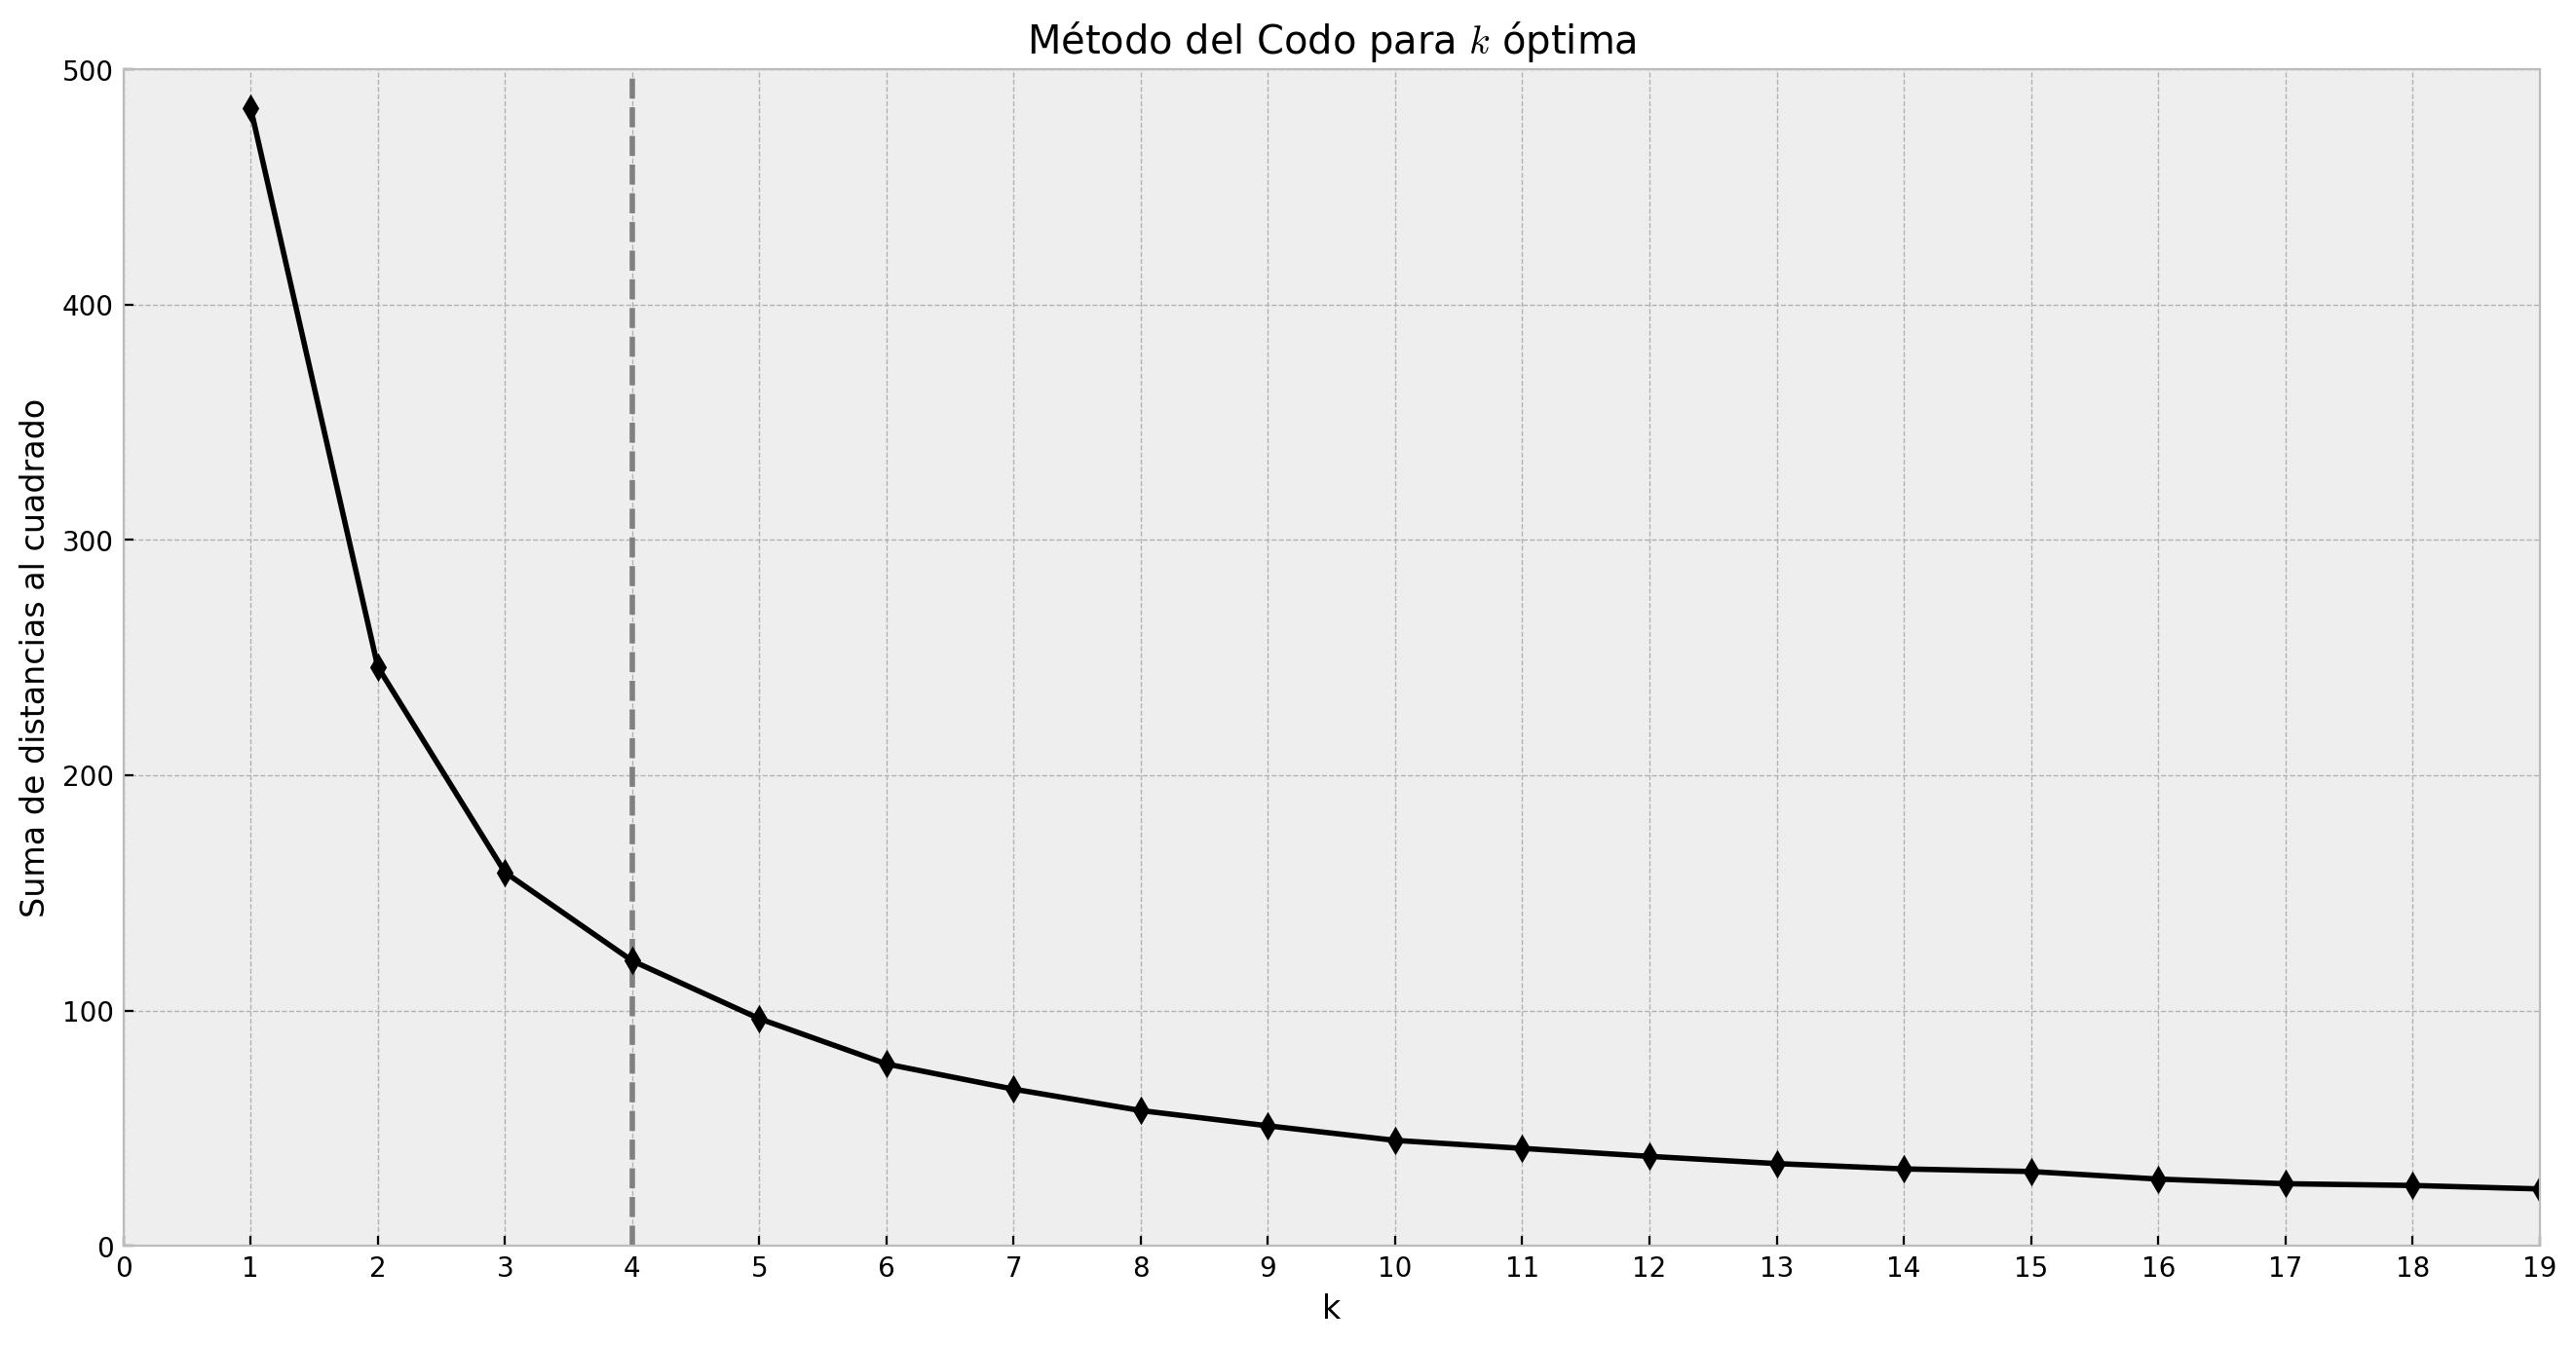

In [54]:
plt.plot(K, Sum_of_squared_distances, 'kd-')
plt.xlabel('k')
plt.ylabel('Suma de distancias al cuadrado')
plt.title(r'Método del Codo para $k$ óptima')
plt.vlines(4, ymin=0, ymax=505, color='grey', linestyle='--')
plt.ylim(0,500)
plt.xlim(0.5,19)
plt.xticks(np.arange(0,20))
plt.show()

In [116]:
0.01 + 0.407 + 0.520 + 0.063

1.0